In [1]:
pip install tensorflow numpy matplotlib


In [2]:
pip install tensorflow numpy requests


In [3]:
pip install opencv-python numpy tensorflow requests


In [4]:
pip install pillow

In [ ]:
from google.colab import files
from PIL import Image
from IPython.display import Image
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
import requests
import json

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

def predict_object(image_array):
    # Preprocess the image array
    img_array = cv2.resize(image_array, (224, 224))
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Get the ResNet50 predictions
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=1)[0]

    object_class = decoded_predictions[0][1]

    return object_class

def get_wikipedia_info(object_class):
    base_url = "https://en.wikipedia.org/w/api.php"
    params = {
        'action': 'query',
        'format': 'json',
        'titles': object_class,
        'prop': 'extracts',
        'exintro': True,
        'explaintext': True
    }

    response = requests.get(base_url, params=params)
    data = json.loads(response.text)

    page_id = next(iter(data['query']['pages'].keys()), '-1')

    if page_id != '-1':
        extract = data['query']['pages'][page_id]['extract']
        return extract
    else:
        return "Information not available."

def take_photo_and_predict(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({ 'video': true });

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for the video to be loaded before capturing a frame.
            await new Promise((resolve) => setTimeout(resolve, 2000));

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getVideoTracks()[0].stop();
            div.remove();

            const photo = canvas.toDataURL('image/jpeg', quality);
            const data = photo.split(',')[1];

            return data;
        }
    ''')
    display(js)

    # Get the image data from JavaScript
    choice=int(input("press 1-image upload ,2-take photo"))
    if(choice==1):
      img = files.upload()
      fname = next(iter(img))
      img=str(img)
      b1=img.replace("squirel.jpg"," ")
      with open(filename, 'wb') as f:
        f.write(b1)
    else:
      data = eval_js('takePhoto({})'.format(quality))
      print(data)
      binary_data = base64.b64decode(data)
      with open(filename, 'wb') as f:
        f.write(binary_data)

    # Read the captured image and predict the object class
    image_array = cv2.imread(filename)
    object_class = predict_object(image_array)

    # Fetch information about the predicted object from Wikipedia
    object_info = get_wikipedia_info(object_class)

    return filename, object_class, object_info

# Call the function to capture a photo and predict the object class
captured_photo, predicted_species, object_info = take_photo_and_predict()

# Display the captured photo, predicted species, and additional information
from IPython.display import Image, display
display(Image(filename=captured_photo))
print(f"Predicted Species: {predicted_species}")
print(f"Information about {predicted_species}: {object_info}")


102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


<IPython.core.display.Javascript object>

102967424/102967424 [==============================] - 0s 0us/step


<IPython.core.display.Javascript object>

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xe2\x01\xd8ICC_PROFILE\x00\x01\x01\x00\x00\x01\xc8\x00\x00\x00\x00\x040\x00\x00mntrRGB XYZ \x07\xe0\x00\x01\x00\x01\x00\x00\x00\x00\x00\x00acsp\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\tdesc\x00\x00\x00\xf0\x00\x00\x00$rXYZ\x00\x00\x01\x14\x00\x00\x00\x14gXYZ\x00\x00\x01(\x00\x00\x00\x14bXYZ\x00\x00\x01<\x00\x00\x00\x14wtpt\x00\x00\x01P\x00\x00\x00\x14rTRC\x00\x00\x01d\x00\x00\x00(gTRC\x00\x00\x01d\x00\x00\x00(bTRC\x00\x00\x01d\x00\x00\x00(cprt\x00\x00\x01\x8c\x00\x00\x00<mluc\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x0cenUS\x00\x00\x00\x08\x00\x00\x00\x1c\x00s\x00R\x00G\x00BXYZ \x00\x00\x00\x00

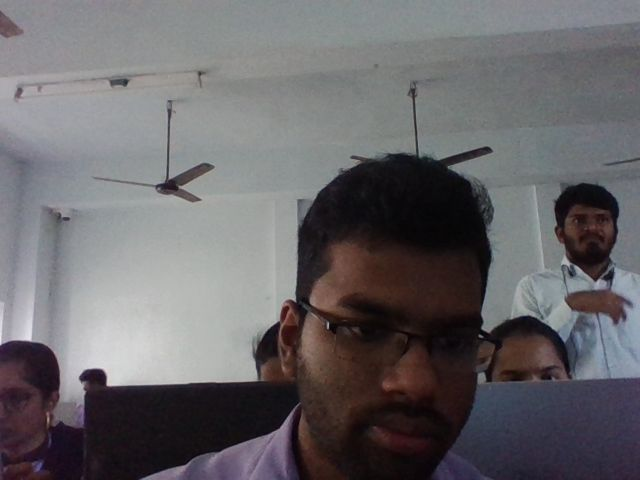

Predicted Species: barbell
Information about barbell: A barbell is a piece of exercise equipment used in weight training, bodybuilding, weightlifting, powerlifting and strongman, consisting of a long bar, usually with weights attached at each end.
Barbells range in length from 1.2 metres (4 ft) to above 2.4 metres (8 ft), although bars longer than 2.2 metres (7.2 ft) are used primarily by powerlifters and are not commonplace. The central portion of the bar varies in diameter from 25 millimetres (0.98 in) to 50 millimetres (1.96 in) (e.g., Apollon's Axle), and is often engraved with a knurled crosshatch pattern to help lifters maintain a solid grip. Weight plates slide onto the outer portions of the bar to increase or decrease the desired total weight. Collars are used to prevent plates from moving outward unevenly so that the lifter does not experience uneven force. 
The barbell is the longer version of the dumbbell that is used for free weight training and competitive sports, such as 

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from IPython.display import display, Javascript
from google.colab.output import eval_js
import base64
import requests
import json
from gtts import gTTS
from IPython.display import Audio

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

def predict_object(image_array):
    # Preprocess the image array
    img_array = cv2.resize(image_array, (224, 224))
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Get the ResNet50 predictions
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=1)[0]

    object_class = decoded_predictions[0][1]

    return object_class

def get_wikipedia_info(object_class):
    base_url = "https://en.wikipedia.org/w/api.php"
    params = {
        'action': 'query',
        'format': 'json',
        'titles': object_class,
        'prop': 'extracts',
        'exintro': True,
        'explaintext': True
    }

    response = requests.get(base_url, params=params)
    data = json.loads(response.text)

    page_id = next(iter(data['query']['pages'].keys()), '-1')

    if page_id != '-1':
        extract = data['query']['pages'][page_id]['extract']
        return extract
    else:
        return "Information not available."

def take_photo_and_predict(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({ 'video': true });

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for the video to be loaded before capturing a frame.
            await new Promise((resolve) => setTimeout(resolve, 2000));

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);

            stream.getVideoTracks()[0].stop();
            div.remove();

            const photo = canvas.toDataURL('image/jpeg', quality);
            const data = photo.split(',')[1];

            return data;
        }
    ''')
    display(js)

    # Get the image data from JavaScript
    data = eval_js('takePhoto({})'.format(quality))

    # Decode the base64-encoded image data
    binary_data = base64.b64decode(data)
    print(binary_data)
    with open(filename, 'wb') as f:
        f.write(binary_data)

    # Read the captured image and predict the object class
    image_array = cv2.imread(filename)
    object_class = predict_object(image_array)

    # Fetch information about the predicted object from Wikipedia
    object_info = get_wikipedia_info(object_class)

    return filename, object_class, object_info

# Call the function to capture a photo and predict the object class
captured_photo, predicted_species, object_info = take_photo_and_predict()

# Display the captured photo, predicted species, and additional information
from IPython.display import Image, display
display(Image(filename=captured_photo))
print(f"Predicted Species: {predicted_species}")
print(f"Information about {predicted_species}: {object_info}")

speech=object_info
langu="en"
gtts_obj=gTTS(text=speech,lang=langu,slow=False)

gtts_obj.save("audio.mp3")

Audio("audio.mp3")

In [ ]:
print(object_info)

A seat belt, also known as a safety belt or spelled seatbelt, is a vehicle safety device designed to secure the driver or a passenger of a vehicle against harmful movement that may result during a collision or a sudden stop. A seat belt reduces the likelihood of death or serious injury in a traffic collision by reducing the force of secondary impacts with interior strike hazards, by keeping occupants positioned correctly for maximum effectiveness of the airbag (if equipped), and by preventing occupants being ejected from the vehicle in a crash or if the vehicle rolls over.
When in motion, the driver and passengers are traveling at the same speed as the vehicle. If the vehicle suddenly stops or crashes, the occupants continue at the same speed the vehicle was going before it stopped. A  applies an opposing force to the driver and passengers to prevent them from falling out or making contact with the interior of the car (especially preventing contact with, or going through, the windshiel

In [ ]:
pip install gtts

In [ ]:
from gtts import gTTS
from IPython.display import Audio

speech=object_info
langu="en"
gtts_obj=gTTS(text=speech,lang=langu,slow=False)

gtts_obj.save("audio.mp3")

Audio("audio.mp3")


ModuleNotFoundError: No module named 'gtts'

In [ ]:
pip install pyttsx3

In [ ]:
import pyttsx3
text=pyttsx3.init()
speech=object_info
text.say(speech)
text.stop()


OSError: libespeak.so.1: cannot open shared object file: No such file or directory